# Kurulum ve Gerekli Modullerin Yuklenmesi

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
import sys
import os

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import nltk
import os
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import nltk

nltk.download('stopwords')
import matplotlib.pyplot as plt
import pandas as pd

nltk.download('punkt')
import string
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import re   

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


# Incelenecek konu basligindaki tweetlerin yuklenmesi 

Burada ornek olarak ulkeler konu basligi gosteriliyor gosteriliyor

In [0]:
os.chdir("/content/gdrive/My Drive/css/dezenformasyon_before")
df3 = pd.read_csv("/content/gdrive/My Drive/css/dezenformasyon_before/dezenformasyon_before_nodublication.csv", engine = 'python')
df3['tweet'] = df3['tweet'].astype(str)

Data pre-processing (on temizlemesi):

1.   kucuk harfe cevirme
2.   turkce karakter uyumlarini duzeltme
3.   ozel karakterleri, noktalamalari temizleme


In [0]:
df3.tweet = df3.tweet.apply(lambda x: re.sub(r"İ", "i",x)) #harika calisiyor
df3.tweet = df3.tweet.apply(lambda x: x.lower())
df3.loc[:,"tweet"] = df3.tweet.apply(lambda x : " ".join(re.findall('[\w]+',x)))

# Tokenize islemi, stop wordlerin atilmasi ve kelime frequencylerini (kullanim sayilarini) ileride gelecek gorsellestirme icin kaydetme

In [0]:
top_N = 10


txt = df3.tweet.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

user_defined_stop_words = ['ekonomi', '1', 'ye', 'nin' ,'nın',  'koronavirüs', 'olsun', 'karşı' , 'covid_19', 'artık', '3', 'sayısı' , 'olarak', 'oldu', 'olan', '2' , 'nedeniyle','bile' , 'sonra' ,'sen','virüs', 'ben', 'vaka' , 'son', 'yeni', 'sayi', 'sayisi','virüsü','bir','com','twitter', 'kadar', 'dan' , 'değil' ,'pic' , 'http', 'https' , 'www' , 'status' , 'var', 'bi', 'mi','yok', 'bu' , 've', 'korona' ,'corona' ,'19' ,'kovid', 'covid'] 

i = nltk.corpus.stopwords.words('turkish')
j = list(string.punctuation) + user_defined_stop_words
stopwords = set(i).union(j)


words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt3 = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt3)
print('=' * 60)

rslt3 = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')

All frequencies, including STOPWORDS:
      Word  Frequency
0    sabır      97410
1     cuma      66069
2      com      64318
3    allah      60777
4       ve      58827
5  twitter      56167
6      bir      43687
7      pic      42162
8       bu      38496
9   versin      36987


# TR deki ilk vakan onceki tweetlerin incelenmek icin yuklenmesi

In [0]:
df2 = pd.read_csv("/content/gdrive/My Drive/css/din_after/din_after_nodublication.csv", engine = 'python')

df2['tweet'] = df2['tweet'].astype(str)

In [0]:
df2['tweet'] = df2['tweet'].astype(str)
df2.tweet = df2.tweet.apply(lambda x: re.sub(r"İ", "i",x)) #harika calisiyor
df2.tweet = df2.tweet.apply(lambda x: x.lower())
df2.loc[:,"tweet"] = df2.tweet.apply(lambda x : " ".join(re.findall('[\w]+',x)))

In [0]:
top_N = 10


txt = df2.tweet.str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

user_defined_stop_words = ['ekonomi', '1', 'ye', 'nin' ,'nın',  'koronavirüs', 'olsun', 'karşı' , 'covid_19', 'artık', '3', 'sayısı' , 'olarak', 'oldu', 'olan', '2' , 'nedeniyle','bile' , 'sonra' ,'sen','virüs', 'ben', 'vaka' , 'son', 'yeni', 'sayi', 'sayisi','virüsü','bir','com','twitter', 'kadar', 'dan' , 'değil' ,'pic' , 'http', 'https' , 'www' , 'status' , 'var', 'bi', 'mi','yok', 'bu' , 've', 'korona' ,'corona' ,'19' ,'kovid', 'covid'] 

i = nltk.corpus.stopwords.words('turkish')
j = list(string.punctuation) + user_defined_stop_words
stopwords = set(i).union(j)


words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords) 

print('All frequencies, including STOPWORDS:')
print('=' * 60)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])
print(rslt)
print('=' * 60)

rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Word', 'Frequency']).set_index('Word')



All frequencies, including STOPWORDS:
      Word  Frequency
0     cuma     184240
1    sabır     177494
2       ve     140161
3      bir      97077
4      com      92638
5       bu      87696
6  twitter      81599
7    allah      79601
8       da      56963
9       de      54980


# Karsilastirmali gorsellestirme (Ayni konu basliklarinin 11 marttan oncesi ve sonrasi )

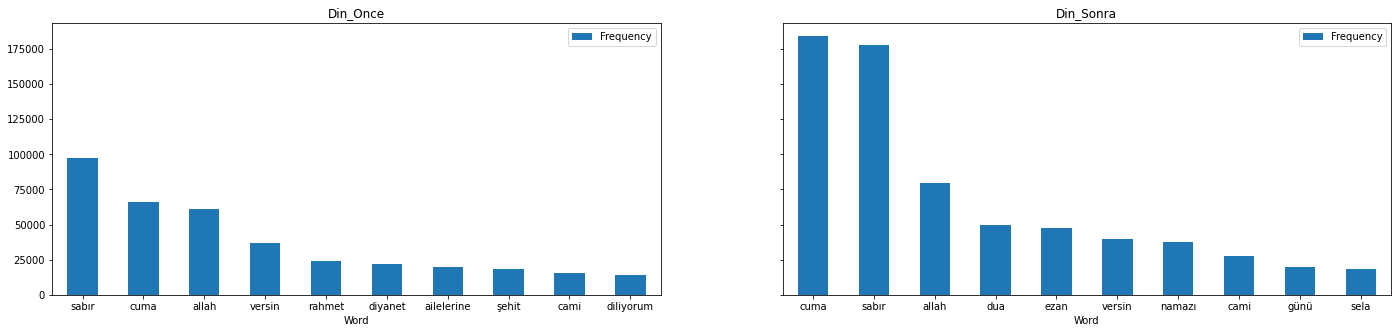

In [0]:
fig, (ax1, ax2) =  plt.subplots(1,2, sharex=False, sharey= True, figsize=(24,5)) 
rslt3.plot.bar(rot=0, ax =ax1 , title = "Din_Once" )
rslt.plot.bar(rot=0, ax =ax2 , title = "Din_Sonra" )
plt.savefig('Din_comparison.png',dpi=300)